## Set Up

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Get the data

In [2]:
SMSs = pd.read_csv('spam.csv', encoding='latin-1')
SMSs = SMSs[['v1', 'v2']].rename(columns={'v1': 'ham/spam', 'v2': 'content'})
SMSs = SMSs.sample(frac=1)
SMSs.shape

(5572, 2)

## Split the data

In [3]:
split = int(SMSs.shape[0]*0.66)
ds_train = SMSs.loc[:split, 'content'].to_numpy()
ds_test = SMSs.loc[split+1:, 'content'].to_numpy()
train_labels = SMSs.loc[:split, 'ham/spam'].apply(lambda x: 1 if x=='spam' else 0).to_numpy()
test_labels = SMSs.loc[split+1:, 'ham/spam'].apply(lambda x: 1 if x=='spam' else 0).to_numpy()
ds_train[0], train_labels[0]

('Painful words- \\I thought being Happy was the most toughest thing on Earth... But',
 0)

## Preprocess the data

In [4]:
max_length = 50
vocab_size = 5000
embedding_size = 20

tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(ds_train)

np.append(ds_test,"YES! The only place in town to meet exciting adult singles is now in the UK. Txt CHAT to 86688 now! 150p/Msg.")
np.append(test_labels,0)

train_sentences = tokenizer.texts_to_sequences(ds_train)
train_sequences = pad_sequences(train_sentences, maxlen=max_length, padding='post', truncating='post')

test_sentences = tokenizer.texts_to_sequences(ds_test)
test_sequences = pad_sequences(test_sentences, maxlen=max_length, padding='post', truncating='post')

train_sequences.shape, test_sequences.shape


((5456, 50), (3128, 50))

## Define function to fit the model and show the results

## Use a bidirectionnal LSTM model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 20)          100000    
_________________________________________________________________
bidirectional (Bidirectional (None, 40)                6560      
_________________________________________________________________
dense (Dense)                (None, 1)                 41        
Total params: 106,601
Trainable params: 106,601
Non-trainable params: 0
_________________________________________________________________


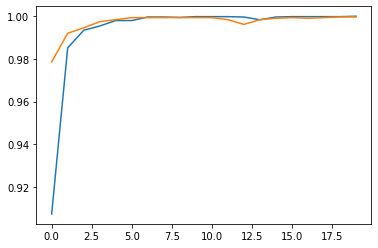

False
False
False
True
False
False
False
False
False
True
True
False
False
False
False
False
False
True
False
False
False
True
False
False
True
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
True
False
False
False
False
True
False
False
False
True
False
False
False
False
True
False
False
False
True
True
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
True
False
False
False
False
True
True
False
False
True
True
False
True


In [5]:
model_lstm = tf.keras.Sequential([
                             tf.keras.layers.Embedding(vocab_size, embedding_size),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_size)),
                             tf.keras.layers.Dense(1, activation='sigmoid')
])
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')
model_lstm.summary()
history = model_lstm.fit(train_sequences, train_labels, epochs=20, validation_data=(test_sequences, test_labels), verbose=0)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()
classes = model_lstm.predict(test_sequences)
for i in classes:
    print(round(i[0])==1)

In [7]:
spamcheck=["You have obtained 1 thousand"]

test_sentences = tokenizer.texts_to_sequences(spamcheck)
test_sequences = pad_sequences(test_sentences, maxlen=max_length, padding='post', truncating='post')

vals = model_lstm.predict(test_sequences)
for i in vals:
    print(round(i[0])==1)

False
